In [25]:
# 자주쓰는 메서드

import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 사이킷런 (Scikit-learn)

- 머신러닝 교육을 위한 파이썬 패키지
- https://scikit-learn.org/stable/
- 데이터 전처리(preprocessing)
- 지도 학습(Supervised learning)
    - : KNN, Naive Bayes, Decision Trees, Support Vector Machine
- 비지도 학습(Unsupervised learning)
    - : Clustering, Gaussian mixture models
- 모형 평가 및 선택 (evaluation and selection)
    - : Cross validation, Model evaluation


| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

In [26]:
import sklearn
sklearn.__version__

'1.0.2'

# XOR 연산 학습

- 두 값의 각 자릿수를 비교해, 값이 같으면 0, 다르면 1을 계산한다. 

In [27]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC   # sklearn의 SVM

### 학습데이타 와 레이블 
```
xor_data =  [
     [0, 0, 0],
     [0, 1, 1],
     [1, 0, 1],
     [1, 1, 0]
 ]
```

In [28]:
X = [ [0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 0]

### 데이타 학습 -> 모델링

In [29]:
model = SVC()
model.fit(X, y)

SVC()

In [30]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 데이터 예측 

In [31]:
model.predict(X)

array([0, 1, 1, 0])

In [32]:
model.predict([[1,1]])

array([0])

In [33]:
model.predict([[1,1],[0,0]])

array([0, 0])

### 모델 평가 : 결과 확인 

- 정답률과 에러률 
```
accuracy_score()
mean_squared_error()
```

In [34]:
from sklearn.metrics import accuracy_score, mean_squared_error
accuracy_score(y, model.predict(X))

1.0

In [35]:
mean_squared_error(model.predict(X), y)

0.0

In [36]:
### XOR 연산 머신러닝 - 데이타프레임 활용

In [37]:
data =  [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

In [38]:
df = pd.DataFrame(data)
df

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [39]:
X = df[[0,1]]
X
y = df[2]
y

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [40]:
model = SVC()
model.fit(X, y)

SVC()

In [41]:
model.predict(X)

array([0, 1, 1, 0], dtype=int64)

In [42]:
model.predict([[0,0], [1,0]])

array([0, 1], dtype=int64)

In [43]:
result = accuracy_score(y_true = y, y_pred= model.predict(X))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [44]:
import sklearn

from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier

## kNN

- k-최근접 이웃 알고리즘
- 새로운 데이터를 입력받았을때 가장 가까이 있는 것은 무엇일까?

<img src='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99631D335A165F182D00A7'>

## 생선 분류 문제

- 출처 : https://www.kaggle.com/aungpyaeap/fish-market

```
1) 데이터 준비 
    도미와 방어의 길이와 무게 
    X, y 
2) 모델 생성 : KNeighborsClassifier
3) 모델 학습 fit()
4) 평가 score()
5) 예측 predict()
```

### 도미 데이터 준비하기

In [45]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [46]:
len(bream_length),len(bream_weight)

(35, 35)

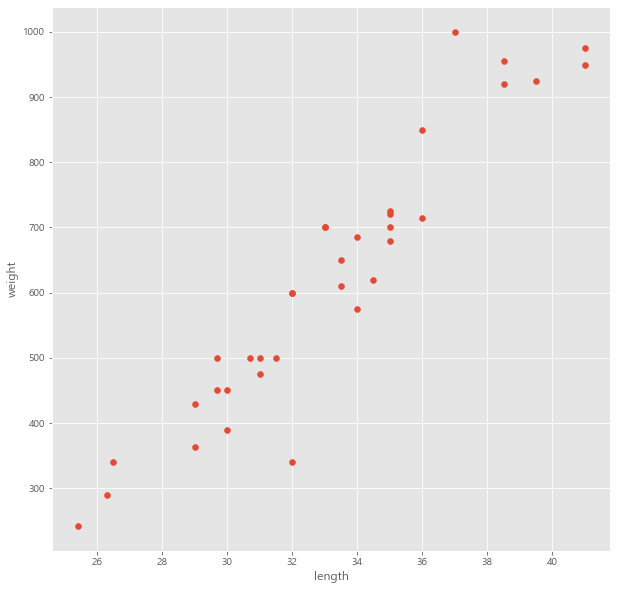

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 



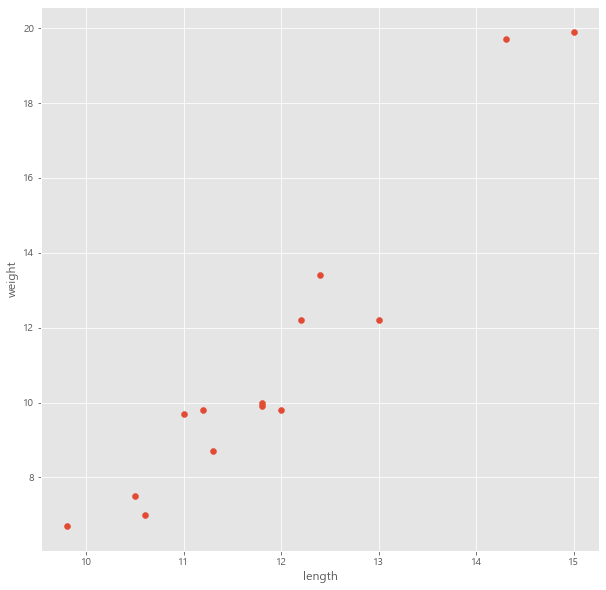

In [48]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
plt.figure(figsize=(10,10))
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

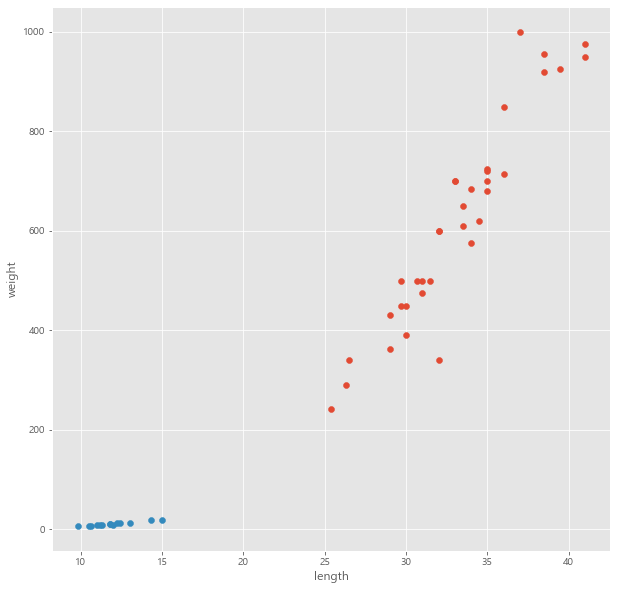

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [50]:
# 리스트 버전 
# 빙어, 도미의 길이 데이타와 무게를 하나의 리스트로 각각 합치기 

length = bream_length+smelt_length
weight = bream_weight+smelt_weight

# zip() 함수를 이용하여 2차원 리스트로 합치기 
fish_data = [[l, w] for l, w in zip(length, weight)]

# print(fish_data)
print(f' {len(fish_data)} 행 {len(fish_data[0])} 열' )

# 생선(도미, 빙어)의 길이와 무게 
# for i, j in fish_data:
#     print(i, j)
fish_data

 49 행 2 열


[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [51]:
# 넘파이 배열 버전 
arr_length = np.array(bream_length+smelt_length).reshape(-1,1)
arr_weight = np.array(bream_length+smelt_length).reshape(-1,1)
print(arr_length.shape, arr_weight.shape)

arr_fish = np.hstack((arr_length, arr_weight))
print(arr_fish.shape)
for i, j in arr_fish:
    print(i, j)

(49, 1) (49, 1)
(49, 2)
25.4 25.4
26.3 26.3
26.5 26.5
29.0 29.0
29.0 29.0
29.7 29.7
29.7 29.7
30.0 30.0
30.0 30.0
30.7 30.7
31.0 31.0
31.0 31.0
31.5 31.5
32.0 32.0
32.0 32.0
32.0 32.0
33.0 33.0
33.0 33.0
33.5 33.5
33.5 33.5
34.0 34.0
34.0 34.0
34.5 34.5
35.0 35.0
35.0 35.0
35.0 35.0
35.0 35.0
36.0 36.0
36.0 36.0
37.0 37.0
38.5 38.5
38.5 38.5
39.5 39.5
41.0 41.0
41.0 41.0
9.8 9.8
10.5 10.5
10.6 10.6
11.0 11.0
11.2 11.2
11.3 11.3
11.8 11.8
11.8 11.8
12.0 12.0
12.2 12.2
12.4 12.4
13.0 13.0
14.3 14.3
15.0 15.0


In [52]:
df_fish = pd.DataFrame(columns=['length', 'weight'])
df_fish['length']=length
df_fish['weight']=weight
print(df_fish.shape)
df_fish 

(49, 2)


,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [53]:
# k-최근접 이웃 알고리즘

- model_kn._fit_X : 학습데이타 X
- model_kn._y : 정답지, 학습데이타 y

SyntaxError: invalid syntax (Temp/ipykernel_12516/2796626931.py, line 3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()

In [ ]:
y = [1]*35 + [0]*14   # 도미 1    빙어  0
print(y)

In [ ]:
# fish_data = [[l, w] for l, w in zip(length, weight)]
model_kn.fit(fish_data, y)

In [ ]:
model_kn.score(fish_data, y)

In [ ]:
# 38.5길이  920 무게의 데이터는 ? 
model_kn.predict([[38.5, 920.0]])  # 결과 예측 => 1  도미


In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### k-최근접 이웃 알고리즘의 매개변수 하이퍼파라미터를 변경하여 보자 

In [ ]:
model_kn49 = KNeighborsClassifier(n_neighbors=49)
model_kn49.fit(fish_data,y)
model_kn49.score(fish_data, y)

```

k-최근접 이웃 알고리즘에서 이웃의 갯수 kn.n_neighbors


파라미터를 5~49까지 변경하여 score() 점수가 1.0 아래로 내려가기 시작하는 이웃의 갯수를 찾아라 
```

In [ ]:

model_kn = KNeighborsClassifier()
model_kn.fit(fish_data, y)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    # 모델명.파라미터 = 값 
    model_kn.n_neighbors = n
    # 점수 계산
    score = model_kn.score(fish_data, y)
    print(f'n={n}, score={score}')
    
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(f'\n\n 100% 정확도에 미치지 못하는 이웃 개수 n={n}, score={score}')
        break

## 훈련 세트와 테스트 세트

- 지도학습 Supervied learning : 입력과 타깃이 모두 있음
- 비지도학습 Unsupervied learning : 입력만 있음 

- 훈련데이타 = 입력 + 타깃 

- 머신러닝 알고리즘의 평가를 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야한다. 
- 평가를 위한 또 다른 데이터를 준비하거나 이미 준비된 데이타중에서 일부를 떼어 내어 활용한다. 
- 테스트 세트 test set : 평가에 사용하는 데이타.
- 훈련 세트 traing set : 훈련에 사용되는 데이타.  

###  데이타수집 

- http://bit.ly/bream_smelt

In [55]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

len(fish_length), len(fish_weight) # 물고기 길이, 무게 

(49, 49)

In [56]:

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

### 훈련데이터, 테스트데이터 분리하여 모델 생성 및 테스트

In [72]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn
print(fish_data[:5])
print(fish_data[44:])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [73]:
# 학습용 데이터셋 생성  => 35개

X_train = fish_data[:35]
y_train = fish_target[:35]

# 테스트용 데이터셋 생성 => 14개

X_test = fish_data[35:]
y_test = fish_target[35:]


##### 샘플링 편향(Sampling bias) 

훈련세트와 테스트 세트에 샘플이 골고루 섞여있지 않고 샘플링이 한쪽에 치워쳤다 

In [75]:
model_kn = model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)
# 도미
# X_train

# 빙어
# y_train

0.0

# 편향된 자료를 섞기
# 넘파이를 이용한 데이타셋 만들기

In [76]:
# 넘파이 배열화
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [77]:
print(input_arr.shape)

(49, 2)


In [78]:
# 랜덤한 인덱스
# 랜덤한 숫자 고정시키기
np.random.seed(42)   

index = np.arange(49)
print(index)
np.random.shuffle(index)
print(index)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [79]:
input_arr[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [80]:
input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [81]:
# 랜덤한 인덱스를 넘파이 배열에 설정
# 학습데이터 35개

X_train = input_arr[index[:35]]
y_train = target_arr[index[:35]]

In [82]:
# 랜덤한 인덱스를 넘파이 배열에 설정
# 테스트데이터 14개

X_test = input_arr[index[35:]]
y_test = target_arr[index[35:]]

X_test

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

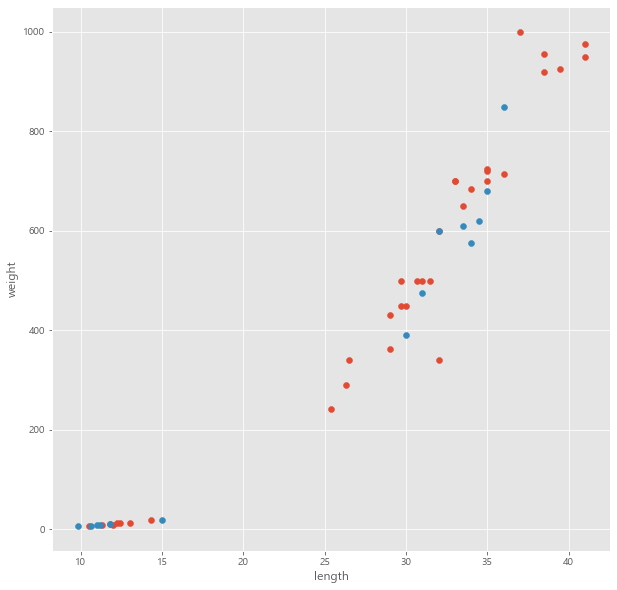

In [85]:
import matplotlib.pyplot as plt
# 학습데이터
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1])
#테스트데이터
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝 학습 및 평가 

In [86]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)              # 학습 데이터 사용
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [87]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [88]:
result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [89]:
# 에러률 
result = mean_squared_error(y_test, model_kn.predict(X_test))
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


In [90]:
# kn 모델  train스코어 
model_kn.score(X_train, y_train)

1.0

In [91]:
# kn 모델  test 스코어 
model_kn.score(X_test, y_test)

1.0

## ** 학습 데이터와 테스트 데이터 세트 분리 메서드  **
```
** 학습 데이터와 테스트 데이터 세트로 분리 **

X는 feature  
y는 target  
순서 지킬것!  
 
X_train, X_test, y_train, y_test = train_test_split( data, label, test_size=float, train_size=float,   
                                                    random_state=value, shuffle=True/False. stratify = label)
                                                   
       
```

In [93]:
from sklearn.model_selection import train_test_split
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [94]:
fish_data, fish_target

([[25.4, 242.0],
  [26.3, 290.0],
  [26.5, 340.0],
  [29.0, 363.0],
  [29.0, 430.0],
  [29.7, 450.0],
  [29.7, 500.0],
  [30.0, 390.0],
  [30.0, 450.0],
  [30.7, 500.0],
  [31.0, 475.0],
  [31.0, 500.0],
  [31.5, 500.0],
  [32.0, 340.0],
  [32.0, 600.0],
  [32.0, 600.0],
  [33.0, 700.0],
  [33.0, 700.0],
  [33.5, 610.0],
  [33.5, 650.0],
  [34.0, 575.0],
  [34.0, 685.0],
  [34.5, 620.0],
  [35.0, 680.0],
  [35.0, 700.0],
  [35.0, 725.0],
  [35.0, 720.0],
  [36.0, 714.0],
  [36.0, 850.0],
  [37.0, 1000.0],
  [38.5, 920.0],
  [38.5, 955.0],
  [39.5, 925.0],
  [41.0, 975.0],
  [41.0, 950.0],
  [9.8, 6.7],
  [10.5, 7.5],
  [10.6, 7.0],
  [11.0, 9.7],
  [11.2, 9.8],
  [11.3, 8.7],
  [11.8, 10.0],
  [11.8, 9.9],
  [12.0, 9.8],
  [12.2, 12.2],
  [12.4, 13.4],
  [13.0, 12.2],
  [14.3, 19.7],
  [15.0, 19.9]],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0

In [96]:
# 학습용 80%,   테스트용 20%  분리
X_train, X_test, y_train, y_test = train_test_split( np.array(fish_data), fish_target, test_size=0.2,
                                                    random_state=1 )
len(X_train), len(X_test),len(y_train),len(y_test)

(39, 10, 39, 10)

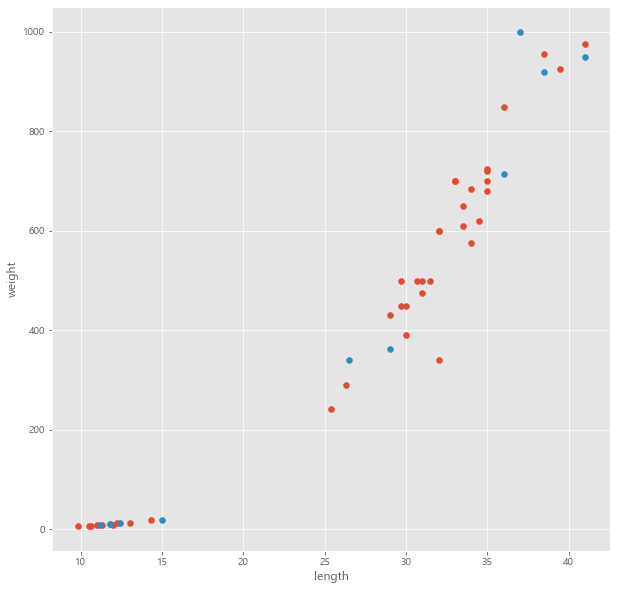

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [99]:
# 학습
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
# 예측 
model_kn.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [101]:
# 예측결과

model_kn.score(X_train, y_train)
model_kn.score(X_test, y_test)

1.0

# 펭귄 날개 길이와 몸무게를 통해 펭귄의 종류 예측
```
아래의 데이타는 펭귄의 날개 길이와 몸무게 그리고 그에 따른 펭귄의 종류이다. 

 펭귄의 날개 길이와 몸무게 => X
 
 펭귄의 종류 => y
 
 사이킷런에서 제공하는 분류기 알고리즘을 이용하여 머신러닝 모델을 생성하고 테스트하여라. 
 
 Chinstrap 제외하고 할것
```

In [102]:
import seaborn as sns
pg = sns.load_dataset('penguins')
pg.shape

(344, 7)

In [103]:
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [104]:
 # 결측 데이터 제거 
pg = pg[pg['species']!='Chinstrap']

pg = pg.dropna(axis=0)                    
pg.shape
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [105]:
flipper_length_mm = list(pg['flipper_length_mm'])
body_mass_g = list(pg['body_mass_g'])
species = list(pg['species'])

In [106]:
penguins_data = np.hstack((np.array(flipper_length_mm).reshape(-1,1), np.array(body_mass_g).reshape(-1,1)))
penguins_data.shape

(265, 2)

In [107]:
# Train, Test 분리
X_train, X_test, y_train, y_test = train_test_split( 
penguins_data, species, random_state=1, stratify=species, test_size=0.3)

In [108]:
X_train.shape, len(y_train)

((185, 2), 185)

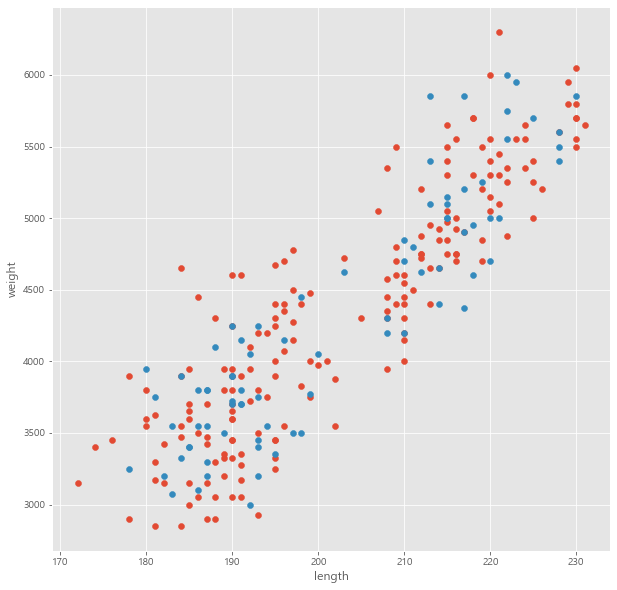

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [111]:
#KNN분류기
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
# 모델 test 점수
model_kn.score(X_test, y_test)

0.9625

In [113]:
# 모델 train 점수
model_kn.score(X_train, y_train)

0.9459459459459459

<AxesSubplot:xlabel='flipper_length', ylabel='body_mass'>

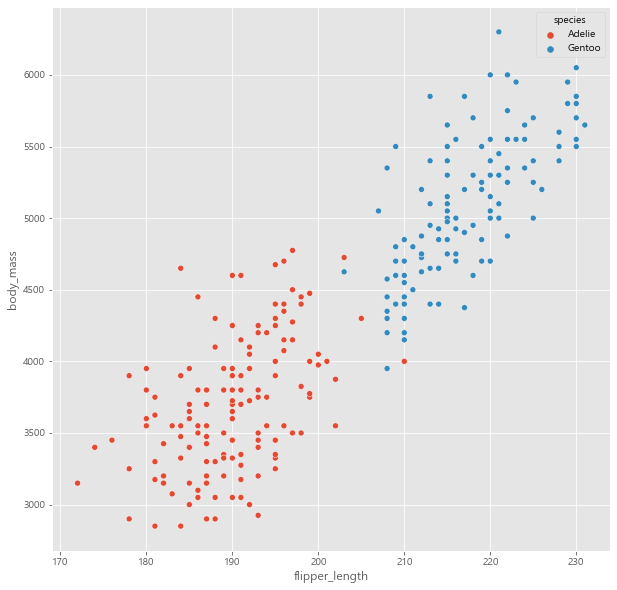

In [115]:
import pandas as pd
plt.figure(figsize=(10,10))
df_p = pd.DataFrame(penguins_data, columns=['flipper_length', 'body_mass'])
df_p['species'] = species
sns.scatterplot(x='flipper_length', y='body_mass', data=df_p, hue='species')

In [116]:
from sklearn.metrics import accuracy_score, mean_squared_error

result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 96.25 %
